# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

In this exercise we will working with the MNIST data-set and reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data.

#### Qa  Load and display the MNIST data

We will fetch the MNIST data with a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. 

Two functions are created. One to fetch the data-set and one to plot a single digit. 

/Users/my-thanh/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of samples: 70000
Label of the digit: 4


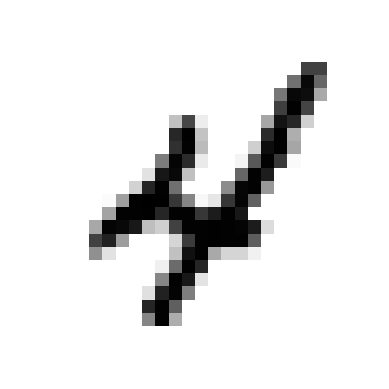

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

# Function to fetch the MNIST dataset
def MNIST_GetDataSet():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
    return X,y


# Function to plot a digit
%matplotlib inline
def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

# Fetches X and y
X,y = MNIST_GetDataSet()

#Convert to [0;1] via scaling
X = X / 255.

#Check if data is loaded
print("Number of samples:", len(X))


digit_to_plot = X[9]  # The index is 9 for the 10th digit (0-based index)

#Check what number the image is representing
print("Label of the digit:", y[9])

MNIST_PlotDigit(digit_to_plot)


As we can see, a random digit is chosen (9). The image is shown and the y_true is 4.

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier
In this section we create a train-test data-set for MNIST and use the `SGDClassifier` as done in [HOML].

We split the data and run the fit-predict for the classifier using the MNIST data.
We will try to predict and identify one-digit. In this example we will try to detect if the image shows the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and non-5.
We will also see if there are any missclassified. 


X.shape=(70000, 784)
Misclassified numbers: [0 1 2]
Predicted Label: False


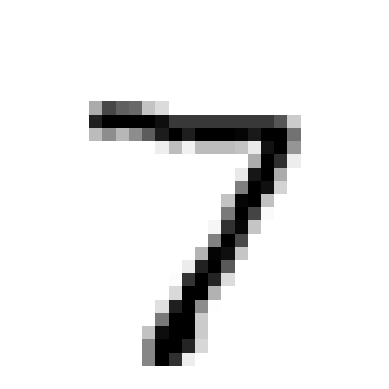

Predicted Label: False


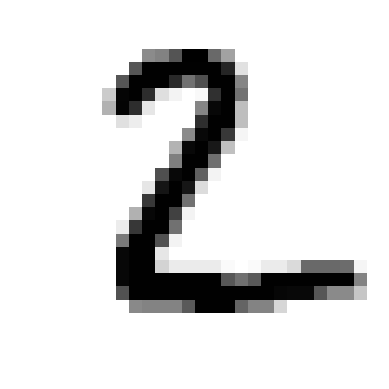

Predicted Label: False


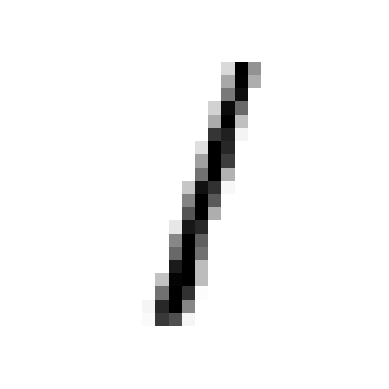

In [39]:
# TODO: add your code here..
import numpy as np
from sklearn.linear_model import SGDClassifier

#reshapes X to 2D array if not already
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Create binary target variable y_train_5 with the digit '5' as true
y_train_5 = (y_train == '5')   # True for all 5s, False for all other digits
# Create binary target variable for the testing set
y_test_5  = (y_test == '5')

# Create a SGDClassifier which will classify if a digit is a 5 or not
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier using the training data
sgd_clf.fit(X_train, y_train_5)

y_pred = sgd_clf.predict(X_test)

classified_numbers = np.where(y_pred == y_test_5)[0]

for number in classified_numbers[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()


Given a loop that iterates through the first 3 instances where y_pred = y_test_5 (correctly classified numbers), we see that the predicted labels are consistent with images

Predicted Label: False


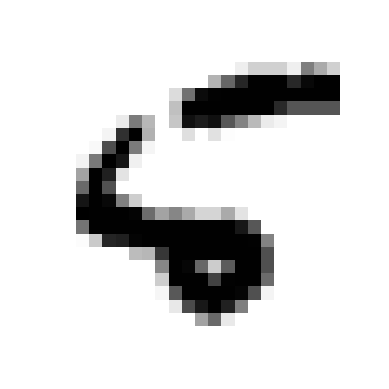

Predicted Label: False


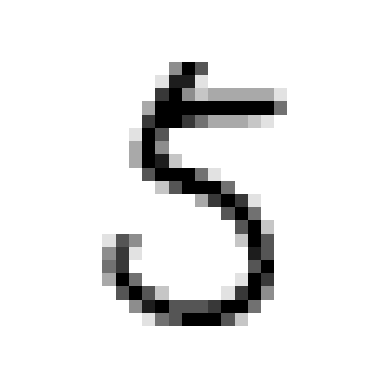

Predicted Label: False


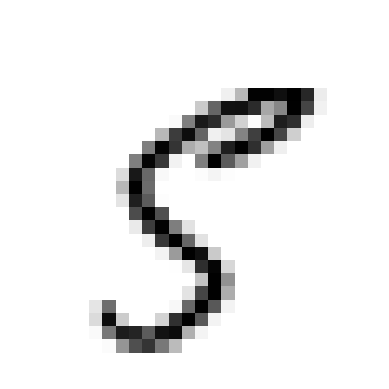

In [41]:
# Find misclassified instances
misclassified_numbers = np.where(y_pred != y_test_5)[0]
classified_numbers = np.where(y_pred == y_test_5)[0]

for number in misclassified_numbers[:3]:
    MNIST_PlotDigit(X_test[number])
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")

    plt.show()


In the same way, we identified some digits that were missclassified. It seems that it is not always precise. 

#### Qc Implement a dummy binary classifier

In this section we try to create a dummy classifier that just classifies every single image in class of the majority, which in this case is the non-5 class.
We call the fit-predict on our dummy class and extract the accuract score from the test data.

In [6]:

from sklearn.metrics import accuracy_score
import numpy as np

class DummyClassifier():
    def fit(self, X, y):
        # does not require any training, only memorizes the unique classes in y.
        self.classes_ = np.unique(y)
        self.dummy_class_ = np.argmax(np.bincount(y))  # Select the most frequent class as the dummy class
        return self

    def predict(self, X):
        # Returns array of the same length as X with the dummy class label
        return np.full(X.shape[0], fill_value=self.dummy_class_)


dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
y_pred = dummy_clf.predict(X_train)
print(any(y_pred)) #predicts if any of the digits is a 5, gives a False

accuracy_score(y_train_5, y_pred)
#90% accuracy, just like in HOML


False


0.90965

With the dummy class every digit is a non-5. 
When we extract the accuracy score we get the same score as in HOML. 

### Qd Conclusion

As seen in the exercise we can use the SGDClassifier to train our data-set from MNIST. Through the exercise we can conclude that the train and test fits and has some correct predictions and some incorrect predictions. 
When testing the performance measures for the classifier it is a bit tricky to evaluate. We see that we get a 90% accuracy score for our DummyClassifier, which only spits a false out for every digit. But because the majority for the digits are non-5 (90% of them), this will then be our score. In this case, the accuracy score does not represent how good/fit our model is at all. We can therefore conclude, that it is not always preferred so use accuracy to define the performance measures when dealing with classifiers. Especially not, in data-sets where some classes are much more frequent than others. 


